In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"feruzr","key":"6157410151343509e8fdc3e8c6bd5272"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle
!kaggle datasets download -d mohitsingh1804/plantvillage
!unzip plantvillage.zip -d plantvillage


Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/762e1022-3ed8-4d96-9f05-e22c0757c8ba___UF.GRC_BS_Lab Leaf 0774.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/767eb77f-de18-4314-a465-4df8d442f468___GCREC_Bact.Sp 5951.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/7684341d-0c30-4bc4-98c5-e09a96483692___GCREC_Bact.Sp 5695.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/7688c6b6-910a-4f6f-854e-e00bf11ce9b0___UF.GRC_BS_Lab Leaf 9045.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/76bf0511-84d8-4609-94e6-248bea3d1465___GCREC_Bact.Sp 6032.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/76dd04b9-ddda-4575-954c-dd3d04ce45aa___GCREC_Bact.Sp 5750.JPG  
  inflating: plantvillage/PlantVillage/train/Tomato___Bacterial_spot/7712359a-9f55-4d3a-8bb5-c123ebf1957e___GCREC_Bact.Sp 6022.JPG  
  inflat

In [ ]:
import os
import shutil


source_base = "./plantvillage/PlantVillage"
target_base = "dataset"


for split in ["train", "val"]:
    for category in ["healthy", "diseased"]:
        os.makedirs(os.path.join(target_base, split, category), exist_ok=True)

def is_healthy(folder_name):
    return "healthy" in folder_name.lower()


for split in ["train", "val"]:
    split_path = os.path.join(source_base, split)
    for folder in os.listdir(split_path):
        folder_path = os.path.join(split_path, folder)
        if os.path.isdir(folder_path):
            target_class = "healthy" if is_healthy(folder) else "diseased"
            target_path = os.path.join(target_base, split, target_class)

            for file in os.listdir(folder_path):
                src_file = os.path.join(folder_path, file)
                dst_file = os.path.join(target_path, file)
                shutil.copy(src_file, dst_file)




✅ Dataset reorganized into binary classes at `dataset/`


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    # Dropout(0.5),  # Helps prevent overfitting
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output: healthy or diseased
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Prepare your training and validation generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "dataset/train"
val_dir = "dataset/val"

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# 🏋️‍♂️ Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Found 43444 images belonging to 2 classes.
Found 10861 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 213s 153ms/step - accuracy: 0.8530 - loss: 0.3160 - val_accuracy: 0.9629 - val_loss: 0.0984
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 202s 148ms/step - accuracy: 0.9610 - loss: 0.1027 - val_accuracy: 0.9761 - val_loss: 0.0710
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 204s 150ms/step - accuracy: 0.9723 - loss: 0.0804 - val_accuracy: 0.9822 - val_loss: 0.0495
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 205s 151ms/step - accuracy: 0.9779 - loss: 0.0609 - val_accuracy: 0.9726 - val_loss: 0.0803
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 201s 148ms/step - accuracy: 0.9832 - loss: 0.0485 - val_accuracy: 0.9909 - val_loss: 0.0262
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 201s 148ms/step - accuracy: 0.9871 - loss: 0.0340 - val_accuracy: 0.9759 - val_loss: 0.0745
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 201s 148ms/step - accuracy: 0.9869 - loss: 0.0370 - val_accuracy: 0.9934 - val_loss: 0.0214
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 213s 157ms/step - ac

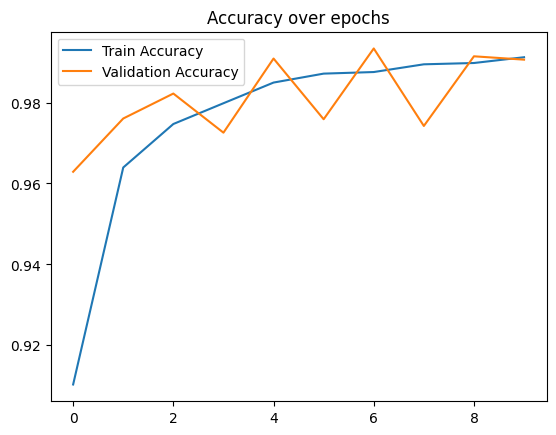

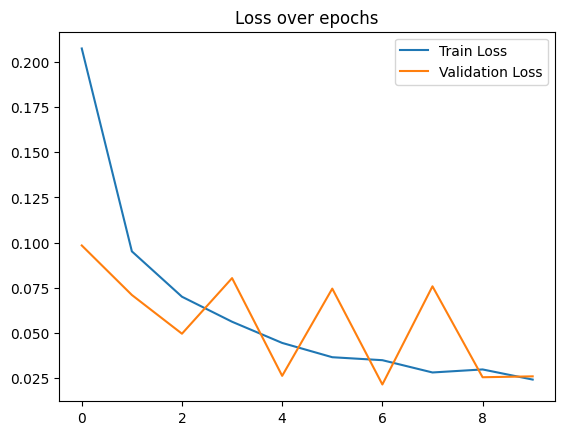

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()


In [ ]:

model.save("leaf_disease_classifier.h5")


In [ ]:
print(train_gen.class_indices)


{'diseased': 0, 'healthy': 1}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!cp leaf_disease_classifier.h5 /content/drive/MyDrive/


Mounted at /content/drive


Saving Screenshot 2025-05-04 164950.png to Screenshot 2025-05-04 164950 (1).png


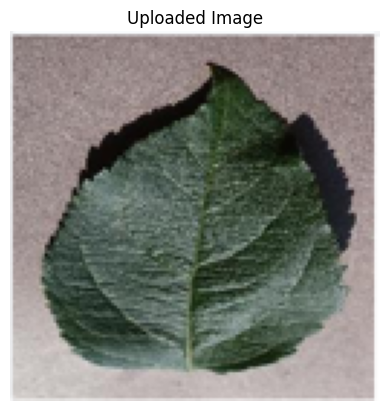

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1.0
Prediction: Healthy (Confidence: 1.0000)


In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/leaf_disease_classifier.h5')
from google.colab import files
uploaded = files.upload()
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


filename = list(uploaded.keys())[0]



img = Image.open(filename).convert('RGB').resize((128, 128))

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 128, 128, 3)

# Predict
pred = model.predict(img_array)[0][0]
print(pred)
label = "Healthy" if pred > 0.5 else "Diseased"
print(f"Prediction: {label} (Confidence: {pred:.4f})")


Saving Screenshot 2025-05-04 164921.png to Screenshot 2025-05-04 164921.png


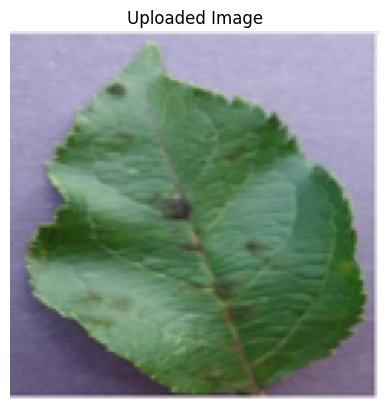

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
0.032421704
Prediction: Diseased (Confidence: 0.0324)


In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/leaf_disease_classifier.h5')
from google.colab import files
uploaded = files.upload()
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


filename = list(uploaded.keys())[0]


img = Image.open(filename).convert('RGB').resize((128, 128))

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 128, 128, 3)

# Predict
pred = model.predict(img_array)[0][0]
print(pred)
label = "Healthy" if pred > 0.5 else "Diseased"
print(f"Prediction: {label} (Confidence: {pred:.4f})")


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d nirmalsankalana/plantdoc-dataset
!unzip plantdoc-dataset.zip -d plantdoc


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/plantdoc-dataset
License(s): CC0-1.0
 96% 856M/896M [00:04<00:00, 164MB/s]
100% 896M/896M [00:05<00:00, 184MB/s]
Archive:  plantdoc-dataset.zip
  inflating: plantdoc/file_renamer.py  
  inflating: plantdoc/folder_renamer.py  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_1.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_10.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_2.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_3.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_4.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_5.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_6.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_7.jpg  
  inflating: plantdoc/test/Apple_Scab_Leaf/test_Apple Scab Leaf_8.jpg  
  inflating: plantdoc/test/App

In [ ]:
import os
import shutil

source_dir = "plantdoc/train"
binary_test_dir = "plantdoc_binary_1"

healthy_folders = {
    "Apple_leaf",
    "Bell_pepper_leaf",
    "Blueberry_leaf",
    "Cherry_leaf",
    "Corn_leaf",
    "Grape_leaf",
    "Peach_leaf",
    "Potato_leaf",
    "Raspberry_leaf",
    "Soyabean_leaf",
    "Strawberry_leaf",
    "Tomato_leaf",
   "Squash_Powdery_mildew_leaf",
}

os.makedirs(os.path.join(binary_test_dir, "healthy"), exist_ok=True)
os.makedirs(os.path.join(binary_test_dir, "diseased"), exist_ok=True)

# Map images to binary labels
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if os.path.isdir(class_path):
        label = "healthy" if class_folder in healthy_folders else "diseased"
        for fname in os.listdir(class_path):
            src = os.path.join(class_path, fname)
            dst = os.path.join(binary_test_dir, label, fname)
            shutil.copy(src, dst)

print("✅ PlantDoc images labeled as healthy/diseased based on full class list.")


✅ PlantDoc images labeled as healthy/diseased based on full class list.


In [ ]:
import os
import shutil

source_dir = "plantdoc/test"
binary_test_dir = "plantdoc_binary_1"

healthy_folders = {
    "Apple_leaf",
    "Bell_pepper_leaf",
    "Blueberry_leaf",
    "Cherry_leaf",
    "Corn_leaf",
    "Grape_leaf",
    "Peach_leaf",
    "Potato_leaf",
    "Raspberry_leaf",
    "Soyabean_leaf",
    "Strawberry_leaf",
    "Tomato_leaf",
   "Squash_Powdery_mildew_leaf",
}


os.makedirs(os.path.join(binary_test_dir, "healthy"), exist_ok=True)
os.makedirs(os.path.join(binary_test_dir, "diseased"), exist_ok=True)

# Map images to binary labels
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if os.path.isdir(class_path):
        label = "healthy" if class_folder in healthy_folders else "diseased"
        for fname in os.listdir(class_path):
            src = os.path.join(class_path, fname)
            dst = os.path.join(binary_test_dir, label, fname)
            shutil.copy(src, dst)




✅ PlantDoc images labeled as healthy/diseased based on full class list.


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = load_model('/content/leaf_disease_classifier.h5')
from google.colab import files

datagen = ImageDataGenerator(rescale=1./255)

test_gen = datagen.flow_from_directory(
    "plantdoc_binary_1",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

loss, acc = model.evaluate(test_gen)
print(f"Accuracy on PlantDoc (binary): {acc * 100:.2f}%")


Found 2920 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 444ms/step - accuracy: 0.9110 - loss: 1.2336
🧪 Accuracy on PlantDoc (binary): 73.56%


92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 424ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


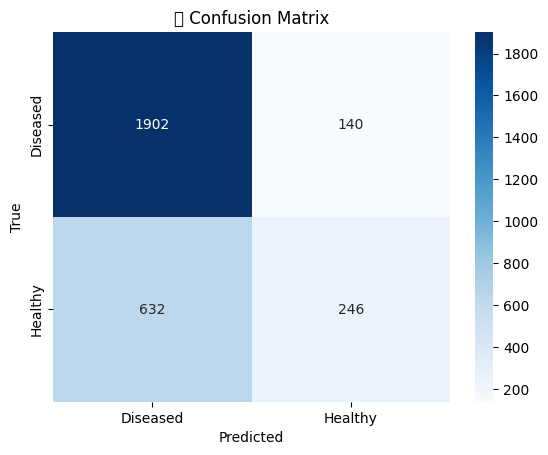

📊 Classification Report:
              precision    recall  f1-score   support

    Diseased       0.75      0.93      0.83      2042
     Healthy       0.64      0.28      0.39       878

    accuracy                           0.74      2920
   macro avg       0.69      0.61      0.61      2920
weighted avg       0.72      0.74      0.70      2920



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get predictions
pred_probs = model.predict(test_gen, verbose=1)
preds = (pred_probs > 0.5).astype(int).flatten()
true_labels = test_gen.classes

# Step 2: Confusion matrix
cm = confusion_matrix(true_labels, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Diseased", "Healthy"], yticklabels=["Diseased", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Classification report
print("Classification Report:")
print(classification_report(true_labels, preds, target_names=["Diseased", "Healthy"]))
